# TO DO

verifica ultimo esercizio

In [31]:
import numpy as np
import matplotlib.pyplot as plt
import scipy

# Direct Methods for the solution of Linear Systems


## Creating Matrixes

- A random matrix (created with the function `np.random.rand()`) with size varying in $n = \{10, 20, 30, ..., 100\}$.
- The Vandermonde matrix (`np.vander`) with dimension $n= \{5,10,15,20,25,30\}$ with respect to the vector $v = {1,2,3,...,n}$.
- The Hilbert matrix (`scipy.linalg.hilbert`) with dimension $n= \{4, 5, 6, ..., 12\}$.

In [32]:
# create an array of random matrices
l_random_N = np.arange(10,101,10)
l_random_matrix = np.array(
    [np.random.rand(dim,dim) for dim in l_random_N],
     dtype=object)

# Create an array of Vandermonde matrices
l_vand_N = np.arange(5,31,5)
l_vand_matrix = np.array(
    [np.vander(np.arange(1,dim+1,1),dim, increasing=False) for dim in l_vand_N], 
    dtype=object)

# Create an array of Hilbert matrices
l_hilb_N = np.arange(4,13,1)
l_hilb_matrix = np.array(
    [scipy.linalg.hilbert(dim) for dim in l_hilb_N],
    dtype=object)



In [73]:
# Create a dictionary to store the matrices
matrix_dict = {
    'random': l_random_matrix,
    'hilbert': l_hilb_matrix,
    'vander': l_vand_matrix
}
# Create a dictionary to store the dimensions
N_dict = {
    'random': l_random_N,
    'hilbert': l_hilb_N,
    'vander': l_vand_N
}

# Function to find if the matrix is well-conditioned or ill-conditioned
def check_conditioning(n, condition_number):
    """
    Check if the matrix A is well-conditioned or ill-conditioned.
    
    Parameters:
    n (int): The size of the matrix.
    condition_number (float): The condition number of the matrix.
    
    Returns:
    str: "well-conditioned" or "ill-conditioned"
    """
    
    # Define a threshold for c (positive constant)
    c = 25 
    
    if condition_number <= c * n:
        return "well-conditioned"
    elif condition_number >= c * 10**n:
        return "ILL-conditioned"
    else:
        return "neither of the two"

## Creating Test Problem

1. Given a matrix $A \in \mathbb{R}^{n \times n}$, the vector $x_{true} = (1,1,...,1)^T \in \mathbb{R}^n$:
    - Computes `x_sol` (test problem).
    - Solves the linear system $Ax = y$ with the function `np.linalg.solve()`.
    - Computes the relative error between the computed solution and the true solution $x_{true}$.
    - Computes the condition number in 2-norm of the matrix $A$. (`cond_ 2_ norm`)
    - Compute the  $\infty$-norm of the matrix $A$. (`cond_inf_norm`)

In [85]:
VERBOSE = False
conditions_2 = {}
conditions_inf = {}
conditions = [conditions_2, conditions_inf]
rel_errors = {}
for key in matrix_dict:
    if VERBOSE:
        print("--------------------")
        print(key)
        print("--------------------")
        print(" ")
    rel_errors[key] = []
    conditions_2[key] = []
    conditions_inf[key] = []
    for i in range(len(matrix_dict[key])):
        # Extract the singular matrix
        A = matrix_dict[key][i]
        n = A.shape[0]
        if VERBOSE:
            print("matrix shape = ", A.shape)
        
        # Solution by construction
        x_true = np.ones((n, ))
        y = A @ x_true

        # Solving the system with numpy
        x_sol = np.linalg.solve(A, y)

        # Computing the relative error
        E_rel = np.linalg.norm(x_true - x_sol, 2) / np.linalg.norm(x_true, 2)
        rel_errors[key].append(E_rel)
        if VERBOSE:
            print("The relative error is ", E_rel)

        # Calculate the condition number in second norm
        cond_2_norm = np.linalg.cond(A, p = 2)
        conditions_2[key].append(cond_2_norm)
        print(f"The  K_2  of {key} with dimension {n} is ",check_conditioning(n, cond_2_norm))
        if VERBOSE:
            print("Condition number (2-norm):", cond_2_norm)

        # Calculate the condition number in infinity norm
        cond_inf_norm = np.linalg.cond(A, p = np.inf)
        conditions_inf[key].append(cond_inf_norm)
        print(f"The K_inf of {key} with dimension {n} is",check_conditioning(n, cond_inf_norm))
        if VERBOSE:
            print("Condition number (inf-norm):", cond_inf_norm)
            print(" ")


The  K_2  of random with dimension 10 is  neither of the two
The K_inf of random with dimension 10 is neither of the two
The  K_2  of random with dimension 20 is  neither of the two
The K_inf of random with dimension 20 is neither of the two
The  K_2  of random with dimension 30 is  well-conditioned
The K_inf of random with dimension 30 is well-conditioned
The  K_2  of random with dimension 40 is  neither of the two
The K_inf of random with dimension 40 is neither of the two
The  K_2  of random with dimension 50 is  well-conditioned
The K_inf of random with dimension 50 is neither of the two
The  K_2  of random with dimension 60 is  neither of the two
The K_inf of random with dimension 60 is neither of the two
The  K_2  of random with dimension 70 is  neither of the two
The K_inf of random with dimension 70 is neither of the two
The  K_2  of random with dimension 80 is  well-conditioned
The K_inf of random with dimension 80 is neither of the two
The  K_2  of random with dimension 90 is

As we can see the condition number of basically every matrix **grows with the dimensionality**. As a consequence, we usualy find a threshold (hilbert $n$ = 6), depend by $n$, that tell us if the matrix is ill-conditioned.

For a positive constant $c>0$ it holds the following definition:
- An invertible matrix $A$ is said to be **ill-conditioned** if its condition number grows exponentially with the dimension of the problem. 
$$k_2(A) \approx c10^{n}$$
- An invertible matrix $A$ is said to be **well-conditioned** if its condition number grows linearly with the dimension of the problem. 
$$k_2(A) \approx cn$$  

I used c = 26 to have some matrices well-conditioned.  
Also we can notice that, usually, if A is ill-conditioned for $k_2$ it is also for $k_{\infty}$

- Plot a graph with the relative errors as a function of $n$
- Plot a graph with the condition number in 2-norm and in $\infty$-norm, as a function of $n$.

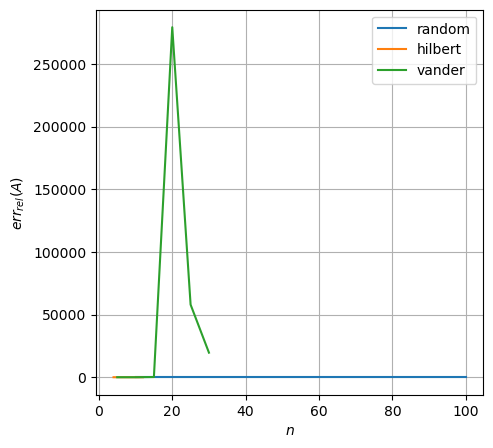

In [87]:
plt.figure(figsize=(5, 5))

for i in matrix_dict:
    plt.plot(N_dict[i], rel_errors[i], label=i)
plt.grid()
plt.legend()
plt.xlabel(r"$n$")
plt.ylabel(r"$ err_{rel}(A)$")
plt.show()

As we can see the $err_{rel}(A)$ of vander is so large that it flattens the graph of the other two matrixes.  

see below

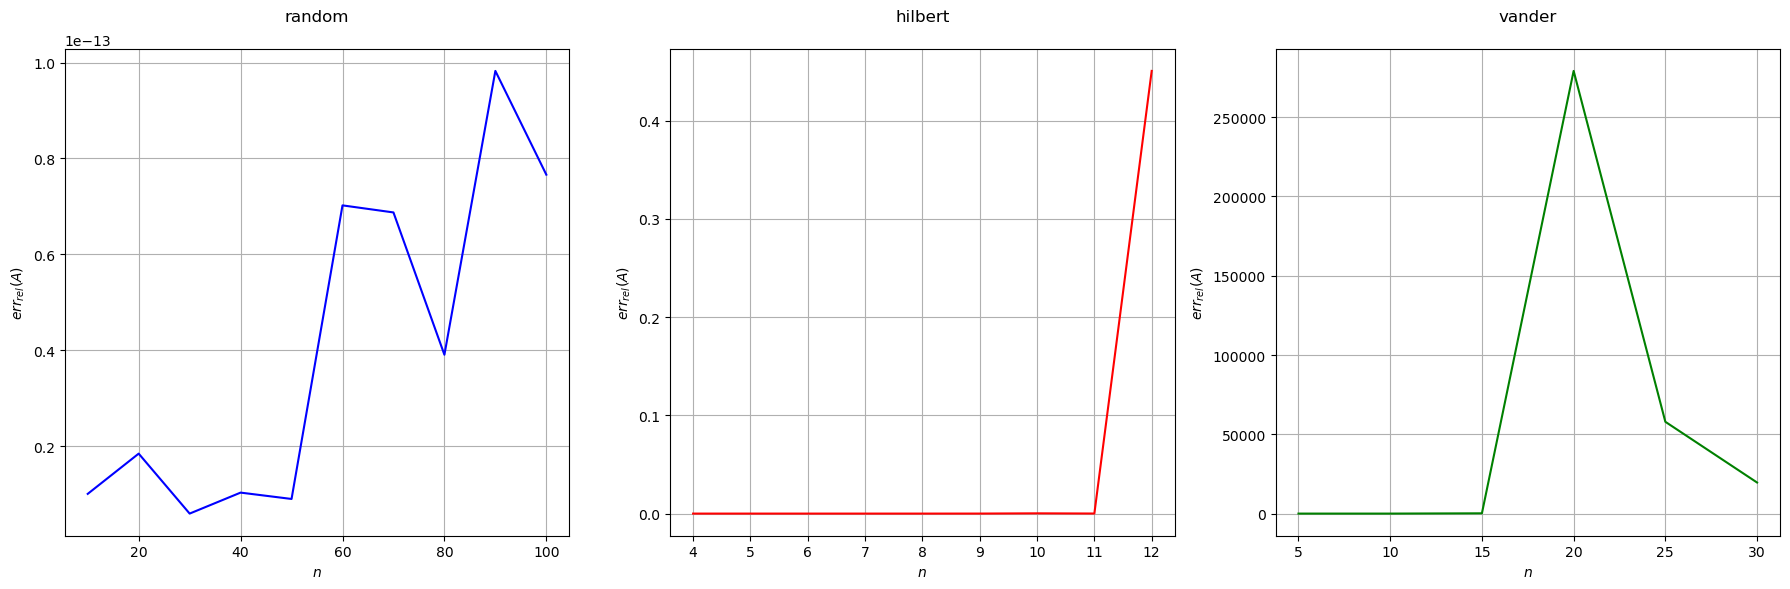

In [96]:
plt.figure(figsize=(18, 6))
j = 0
colors = ['b', 'r', 'g']
for i in matrix_dict:
    plt.subplot(1, 3, j+1)
    plt.title(i, pad=20)
    plt.plot(N_dict[i], rel_errors[i], color=colors[j], label=i)
    plt.grid()
    plt.xlabel(r"$n$")
    plt.ylabel(r"$ err_{rel}(A)$")
    j += 1
plt.tight_layout()
plt.show()

The graphs show us that more the dimension increases, more the $err_{rel}$ increases.  
For random it gets slightly worse steadily as you progress.  
For hilbert it maintains a good level until it explodes.  
Also for vander until 15.  

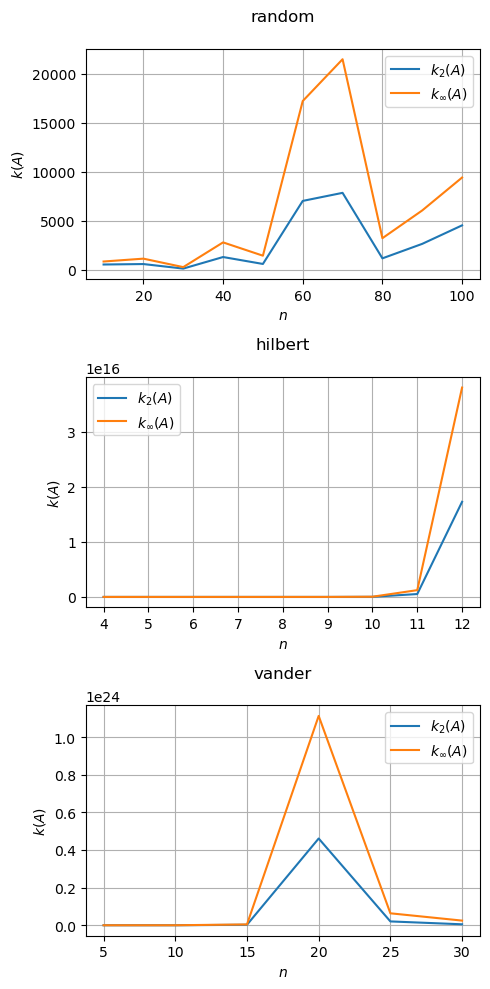

In [77]:
plt.figure(figsize=(5, 10))
j = 0
for i in matrix_dict:
    plt.subplot(3, 1, j+1)
    plt.title(i, pad=20)
    plt.plot(N_dict[i], conditions[0][i])
    plt.plot(N_dict[i], conditions[1][i])
    plt.grid()
    plt.xlabel(r"$n$")
    plt.ylabel(r"$ k(A)$")
    plt.legend([r"$ k_2(A)$",r"$ k_{\infty}(A)$"])
    j += 1
plt.tight_layout()
plt.show()

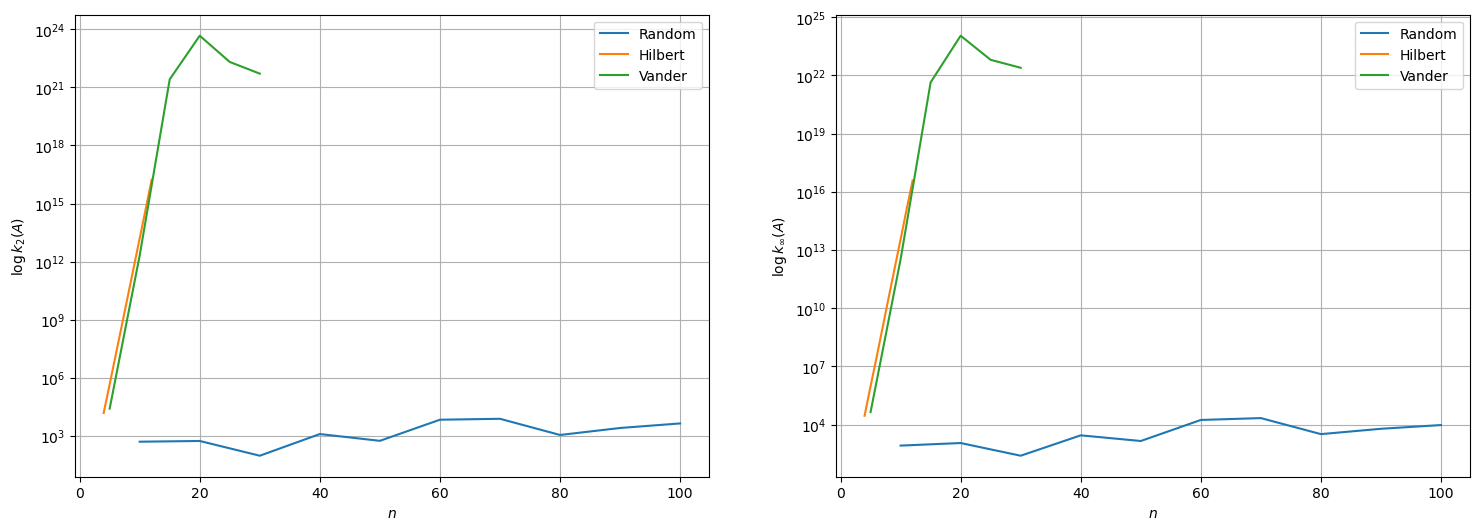

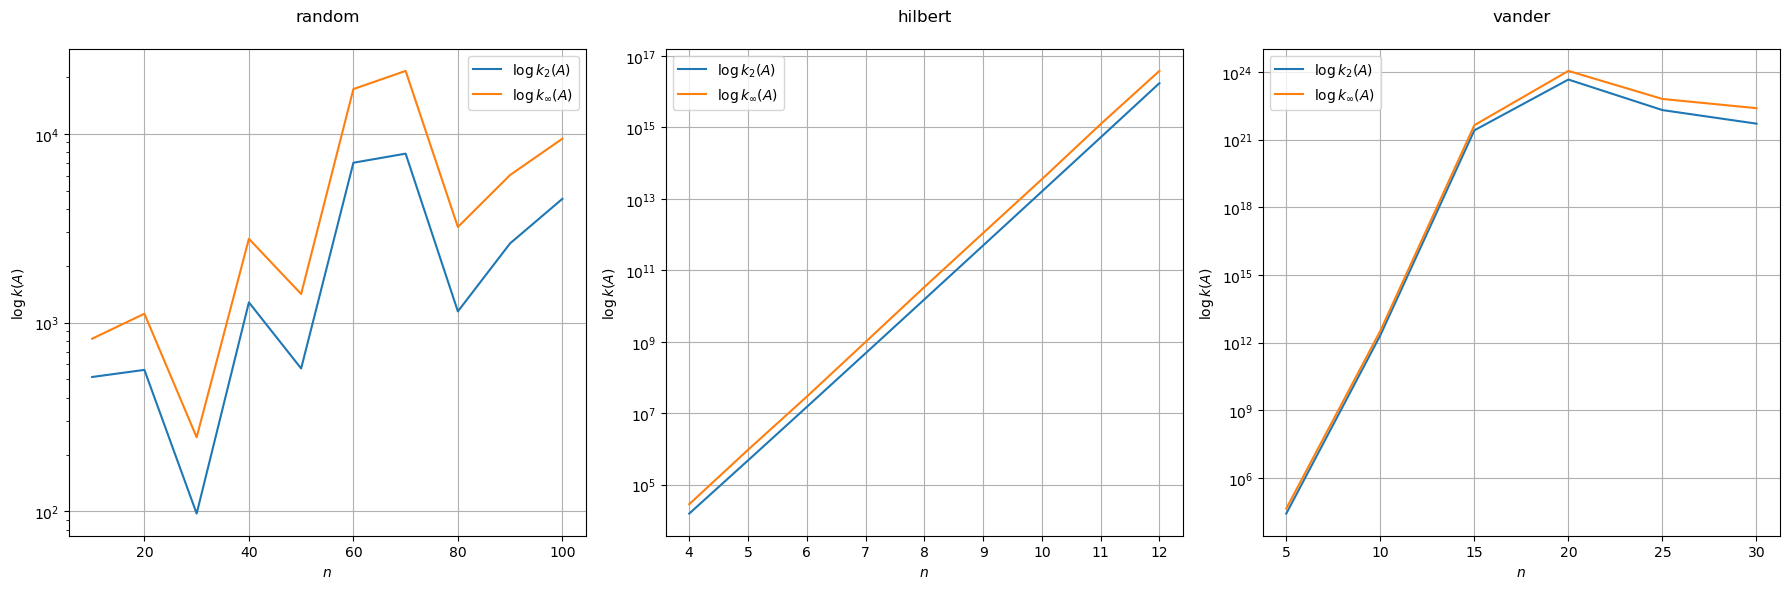

In [99]:
# Make a plot with log scaling on the y-axis
plt.figure(figsize=(18, 6))
for i,condition in enumerate(conditions):
    plt.subplot(1, 2, i+1)
    plt.semilogy(l_random_N, condition['random'])
    plt.semilogy(l_hilb_N, condition['hilbert'])
    plt.semilogy(l_vand_N, condition['vander'])
    plt.grid()
    plt.xlabel(r"$n$")
    if condition == conditions_2:
        plt.ylabel(r"$\log k_2(A)$")
    else:
        plt.ylabel(r"$\log k_{\infty}(A)$")
    plt.legend(["Random", "Hilbert", "Vander"])
plt.show()


plt.figure(figsize=(18, 6))
j = 0
for i in matrix_dict:
    plt.subplot(1, 3, j+1)
    plt.title(i, pad=20)
    plt.semilogy(N_dict[i], conditions[0][i])
    plt.semilogy(N_dict[i], conditions[1][i])
    plt.grid()
    plt.xlabel(r"$n$")
    plt.ylabel(r"$\log k(A)$")
    plt.legend([r"$\log k_2(A)$",r"$\log k_{\infty}(A)$"])
    j += 1
plt.tight_layout()
plt.show()

# Floating point arithmetic

1. The Machine epsilon $\epsilon$ is defined as the smallest floating point number such that it holds: $fl(1 + \epsilon) > 1$. Compute $\epsilon$. 

In [79]:
epsilon = 1.0
mantissa = 0

while 1.0 + epsilon > 1.0:
    mantissa += 1
    epsilon /= 2.0

epsilon *= 2.0

print(f"The machine epsilon is: {epsilon} and the mantissa t is: {mantissa}")

The machine epsilon is: 2.220446049250313e-16 and the mantissa t is: 53



Halving a number (dividing by 2.0) in base-2 corresponds to reducing the exponent by 1, which is the most efficient way to find the smallest distinguishable increment.  
Using 2.0 ensures that the method is both efficient and aligned with the binary structure of floating-point arithmetic, allowing the calculation to converge exactly at the machine epsilon.  
the mantissa has 53 bits, including one implicit bit for normalization (so only 52 bits are explicitly stored).  

2. Let’s consider the sequence $a_n = (1 + \frac{1}{n})^n$.  
$$\lim_{n \to \infty} a_n = e$$ 
where $e$ is the Nepero number. 

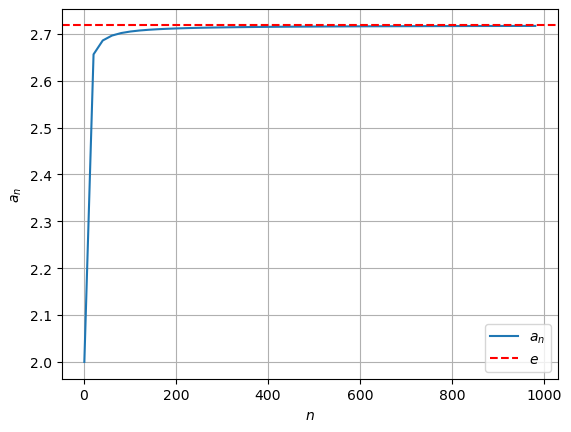

In [80]:
n = np.arange(1, 1_001, 20)

a = (1+(1/n))**n

plt.plot(n, a)
plt.axhline(y=np.e, color='r', linestyle='--')
plt.grid()
plt.xlabel(r"$n$")
plt.ylabel(r"$a_{n}$")
plt.legend([r"$a_{n}$",r"$e$"])
plt.show()

3. Let’s consider the matrices:

$$
A = \begin{bmatrix} 4 & 2 \\ 1 & 3 \end{bmatrix} \quad B = \begin{bmatrix} 4 & 2 \\ 2 & 1 \end{bmatrix}
$$

Compute the rank of $A$ and $B$ and their eigenvalues.

In [81]:
A = np.array([[4, 2], [1, 3]])
B = np.array([[4, 2], [2, 1]])

print("Rank of A:", np.linalg.matrix_rank(A), " A is full rank dim di A :", A.shape[0])
print("Rank of B:", np.linalg.matrix_rank(B), " B is NOT full rank dim di B :", B.shape[0])
print("Determinant of A:", np.linalg.det(A))
print("Determinant of B:", np.linalg.det(B))
print("Eigenvalues of A:", np.linalg.eigvals(A))
print("Eigenvalues of B:", np.linalg.eigvals(B))


Rank of A: 2  A is full rank dim di A : 2
Rank of B: 1  B is NOT full rank dim di B : 2
Determinant of A: 10.000000000000002
Determinant of B: 0.0
Eigenvalues of A: [5. 2.]
Eigenvalues of B: [5. 0.]


In a full rank the determinant is non-zero, so all eigenvalues are non-zero.  
This beacause of the linear indipendence between the colums and rows of the matrix, that creates a basis of a vector space, so for each existing eigenvector, it is expand or reduce of a factor(>0) equal to the eigenvalue along his span.  
While in the other hand, since B is not full rank matrix, it implies that the matrix is a trasformation that reduces the dimension, so we have that the determinant is zero and also at least one of the eigenvalue, due to the eigen vector that is reduce of dimension (it has to be not null and has to be part of the ker(A)).

In [113]:
C =np.array([[0,-1],[1,0]]) 
print("Rank of C:", np.linalg.matrix_rank(C), " C is full rank dim di C :", C.shape[0])
print("Determinant of C:", np.linalg.det(C))
print("Eigenvalues of C:", np.linalg.eigvals(C))


Rank of C: 2  C is full rank dim di C : 2
Determinant of C: 1.0
Eigenvalues of C: [0.+1.j 0.-1.j]


If A is a square matrix, by the Spectral Theorem or by the Fundamental Theorem of Algebra, there will always exist a number of eigenvalues ​​(at least complex ones) equal to the arngo, associated with the matrix A.  
Consequently, the corresponding eigenvectors will also exist.